<a href="https://colab.research.google.com/github/electropavuk/nn/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №4
### з дисципліни "Нейронні мережі"
### студента групи КН-31/2
### Маурін Андрій
### Варіант №4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#  DEFINE CONSTANTS

INPUT_SHAPE = 784
NUM_CATEGORIES = 10

LABEL_DICT = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

data_dir = '/content/drive/MyDrive/lab1_data'
train_raw = pd.read_csv(data_dir + '/fashion-mnist_test.csv').values
test_raw = pd.read_csv(data_dir + '/fashion-mnist_test.csv').values

In [ ]:
train_x, train_y = (train_raw[:,1:], to_categorical(train_raw[:,0], num_classes = NUM_CATEGORIES))
test_x, test_y = (test_raw[:,1:], to_categorical(test_raw[:,0], num_classes = NUM_CATEGORIES))

train_x = train_x / 255
test_x = test_x / 255

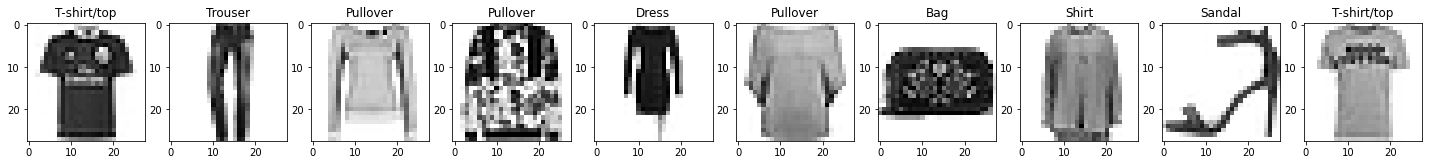

In [ ]:
sample_size = 10
sample_x = train_x[:sample_size]
sample_y = train_y[:sample_size]

w = h = 10
fig = plt.figure(figsize=(25, 25))
for i in range(sample_size):
    img = sample_x[i].reshape((28, 28))
    fig.add_subplot(1, sample_size, i + 1)
    name = LABEL_DICT[sample_y[i].argmax()]
    plt.imshow(img, cmap='binary')
    plt.title(name)
plt.show()

In [ ]:
def build_model(n_hidden, n_neurons, activation='relu'):
    model = Sequential()

    for i in range(n_hidden):
        model.add(Dense(n_neurons, input_dim=INPUT_SHAPE))
        model.add(Activation(activation))

    model.add(Dense(NUM_CATEGORIES))
    model.add(Activation('softmax'))

    model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    return model

In [ ]:
results = {}

for n_hidden in range(10):
    model = build_model(n_hidden, n_neurons=100)
    
    model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y), verbose=0)
    loss, accuracy = model.evaluate(train_x, train_y, verbose=0)
    print(f'{n_hidden} hidden layers : accuracy = {accuracy}')
    results[n_hidden] = accuracy



0 hidden layers : accuracy = 0.8603000044822693
1 hidden layers : accuracy = 0.9052000045776367
2 hidden layers : accuracy = 0.8521000146865845
3 hidden layers : accuracy = 0.9039999842643738
4 hidden layers : accuracy = 0.8700000047683716
5 hidden layers : accuracy = 0.8813999891281128
6 hidden layers : accuracy = 0.8870999813079834
7 hidden layers : accuracy = 0.8794000148773193
8 hidden layers : accuracy = 0.8881000280380249
9 hidden layers : accuracy = 0.8802000284194946


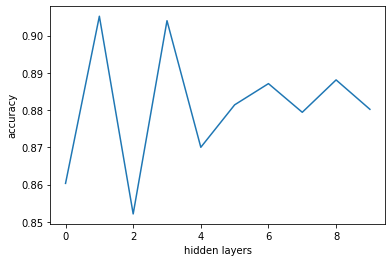

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('hidden layers')
plt.ylabel('accuracy')
plt.show()

In [ ]:
results = {}

for n_neurons in [10, 50, 100, 200, 500]:
    model = build_model(n_hidden=3, n_neurons=n_neurons)
    
    model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y), verbose=0)
    loss, accuracy = model.evaluate(train_x, train_y, verbose=0)
    print(f'{n_neurons} hidden layers : accuracy = {accuracy}')
    results[n_neurons] = accuracy



10 hidden layers : accuracy = 0.8104000091552734
50 hidden layers : accuracy = 0.8694999814033508
100 hidden layers : accuracy = 0.8917999863624573
200 hidden layers : accuracy = 0.9025999903678894
500 hidden layers : accuracy = 0.8712000250816345


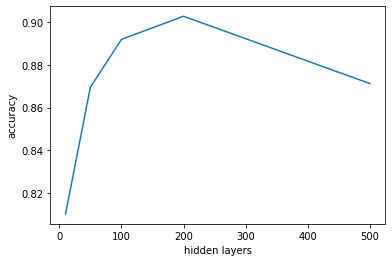

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('hidden layers')
plt.ylabel('accuracy')
plt.show()

## Висновок
Для виконання класифікації картинок одягу ми використали повнозв'язну нейронну мережу. Протествували різну кількість шарів і нейронів в цих шарах. Для даного датасету оптимальне використання 200 нейронів для 1-3 шарів. Інші значення призводять до того що модель запроста (underfit) і не може наблизити залежність, або заскладна (overfit) і дуже підстроюється під тренерований датасет.